## Importing Libraries

In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [101]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [102]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [103]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[120.   112.75 123.  ]
   [239.25 229.25 240.25]
   [232.25 219.25 229.25]
   ...
   [ 77.5   79.5  104.5 ]
   [ 83.5   85.5  110.5 ]
   [ 81.    83.   108.  ]]

  [[115.25 108.75 118.25]
   [228.5  218.   229.25]
   [223.75 209.75 222.75]
   ...
   [ 87.25  89.25 114.25]
   [ 80.5   82.5  107.5 ]
   [ 76.25  78.25 103.25]]

  [[110.25 103.   114.75]
   [209.25 197.75 209.5 ]
   [208.25 194.25 207.25]
   ...
   [ 80.5   82.5  107.5 ]
   [ 85.5   87.5  112.5 ]
   [ 82.    84.   109.  ]]

  ...

  [[ 56.75  47.25  58.75]
   [105.    88.   104.  ]
   [109.    91.   107.  ]
   ...
   [ 57.    60.    79.  ]
   [ 62.25  65.25  84.25]
   [ 62.    65.    84.  ]]

  [[ 56.    46.5   58.  ]
   [104.5   87.5  103.5 ]
   [109.5   91.5  107.5 ]
   ...
   [ 63.25  66.25  85.25]
   [ 56.25  59.25  78.25]
   [ 58.25  61.25  80.25]]

  [[ 56.    46.5   58.  ]
   [107.5   90.5  106.5 ]
   [113.    95.   111.  ]
   ...
   [ 58.75  61.75  80.75]
   [ 57.5   60.5   79.5 ]
   [ 53.5   56.5   7

### Building Model

In [104]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [105]:
model=Sequential()

In [106]:
##Building Convolution Layer

In [107]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [108]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [109]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [110]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [111]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [112]:
model.add(Dropout(0.25))

In [113]:
model.add(Flatten())

In [114]:
model.add(Dense(units=1500,activation="relu"))

In [115]:
model.add(Dropout(0.4))

In [116]:
##Output Layer

In [117]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [118]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

### Model Training

In [120]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 293s 131ms/step - loss: 1.3797 - accuracy: 0.5937 - val_loss: 0.4905 - val_accuracy: 0.8432
Epoch 2/10
2197/2197 [==============================] - 282s 128ms/step - loss: 0.4665 - accuracy: 0.8531 - val_loss: 0.2993 - val_accuracy: 0.9031
Epoch 3/10
2197/2197 [==============================] - 383s 174ms/step - loss: 0.2761 - accuracy: 0.9101 - val_loss: 0.2304 - val_accuracy: 0.9252
Epoch 4/10
2197/2197 [==============================] - 252s 114ms/step - loss: 0.1871 - accuracy: 0.9385 - val_loss: 0.1899 - val_accuracy: 0.9376
Epoch 5/10
2197/2197 [==============================] - 263s 120ms/step - loss: 0.1402 - accuracy: 0.9537 - val_loss: 0.1570 - val_accuracy: 0.9481
Epoch 6/10
2197/2197 [==============================] - 266s 120ms/step - loss: 0.1131 - accuracy: 0.9623 - val_loss: 0.1703 - val_accuracy: 0.9467
Epoch 7/10
2197/2197 [==============================] - 319s 145ms/step - loss: 0.0882 - accuracy: 0.9709 - val_

## Model Evaluation

In [122]:
# Model Evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 135s 61ms/step - loss: 0.0208 - accuracy: 0.9938


In [123]:
print(train_loss,train_acc)

0.02078564278781414 0.9937548637390137


In [124]:
# Model Evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 36s 64ms/step - loss: 0.1059 - accuracy: 0.9686


In [125]:
print(val_loss,val_acc)

0.10585463792085648 0.9685863852500916


## Saving Model

In [127]:
model.save("trained.keras")

In [129]:
training_history.history

{'loss': [1.3796920776367188,
  0.46652722358703613,
  0.2760623097419739,
  0.18710389733314514,
  0.14015653729438782,
  0.11307182908058167,
  0.08818504214286804,
  0.07325893640518188,
  0.06504229456186295,
  0.060032475739717484],
 'accuracy': [0.5937122106552124,
  0.853062093257904,
  0.9100931882858276,
  0.9385020136833191,
  0.9537236094474792,
  0.9623444080352783,
  0.9709225296974182,
  0.9762002825737,
  0.978775143623352,
  0.9812219738960266],
 'val_loss': [0.4904891848564148,
  0.29925084114074707,
  0.2304466813802719,
  0.18987828493118286,
  0.15695522725582123,
  0.1702546775341034,
  0.1451001912355423,
  0.1692117154598236,
  0.2550990879535675,
  0.10585465282201767],
 'val_accuracy': [0.843159556388855,
  0.9031413793563843,
  0.925165057182312,
  0.937571108341217,
  0.9480992555618286,
  0.9466765522956848,
  0.9548144936561584,
  0.9488959908485413,
  0.9321079254150391,
  0.9685863852500916]}

In [130]:
#Recording History in json
import json
with open("training_his.json","w") as f:
    json.dump(training_history.history,f)

## Accurary Visualization

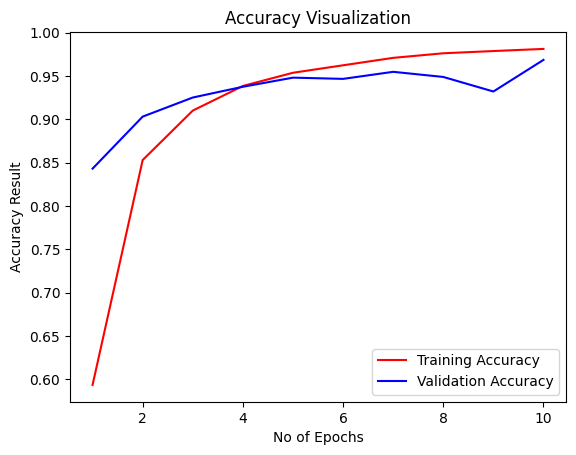

In [133]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Accuracy Visualization")
plt.legend()
plt.show()

## Model Evaluation metrics

In [134]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [135]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [136]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 56s 97ms/step


(array([[9.9999928e-01, 5.6191669e-09, 6.7006206e-11, ..., 1.3630991e-14,
         3.5269330e-15, 9.5254486e-14],
        [9.9877161e-01, 1.2107522e-03, 1.4799146e-07, ..., 4.3687172e-11,
         8.2401314e-10, 3.6709732e-10],
        [1.0000000e+00, 2.5556486e-09, 2.0450881e-11, ..., 7.8801932e-18,
         3.3322477e-16, 9.6072306e-15],
        ...,
        [1.4552187e-08, 1.5578136e-11, 8.2236724e-09, ..., 4.1699240e-09,
         2.7787578e-10, 9.9998677e-01],
        [1.7448704e-07, 6.0123233e-11, 1.2759799e-08, ..., 8.2198960e-07,
         2.2209861e-09, 9.9986017e-01],
        [1.1636324e-15, 9.9594789e-19, 8.6655436e-16, ..., 2.7231467e-17,
         3.1339417e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [137]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [138]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [139]:
Y_True=tf.argmax(true_categories,axis=1)
Y_True

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [142]:
from sklearn.metrics import classification_report,confusion_matrix

In [143]:
classification_report(Y_True,predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.94      0.96      0.95       504\n                                 Apple___Black_rot       0.96      1.00      0.98       497\n                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440\n                                   Apple___healthy       0.97      0.93      0.95       502\n                               Blueberry___healthy       0.99      0.97      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421\n                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410\n                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.96      

In [145]:
cm=confusion_matrix(Y_True,predicted_categories)
cm

array([[483,   8,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 470,   1,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   1, ...,   0,   0, 476]], dtype=int64)

## Confusion Matrix Visualization

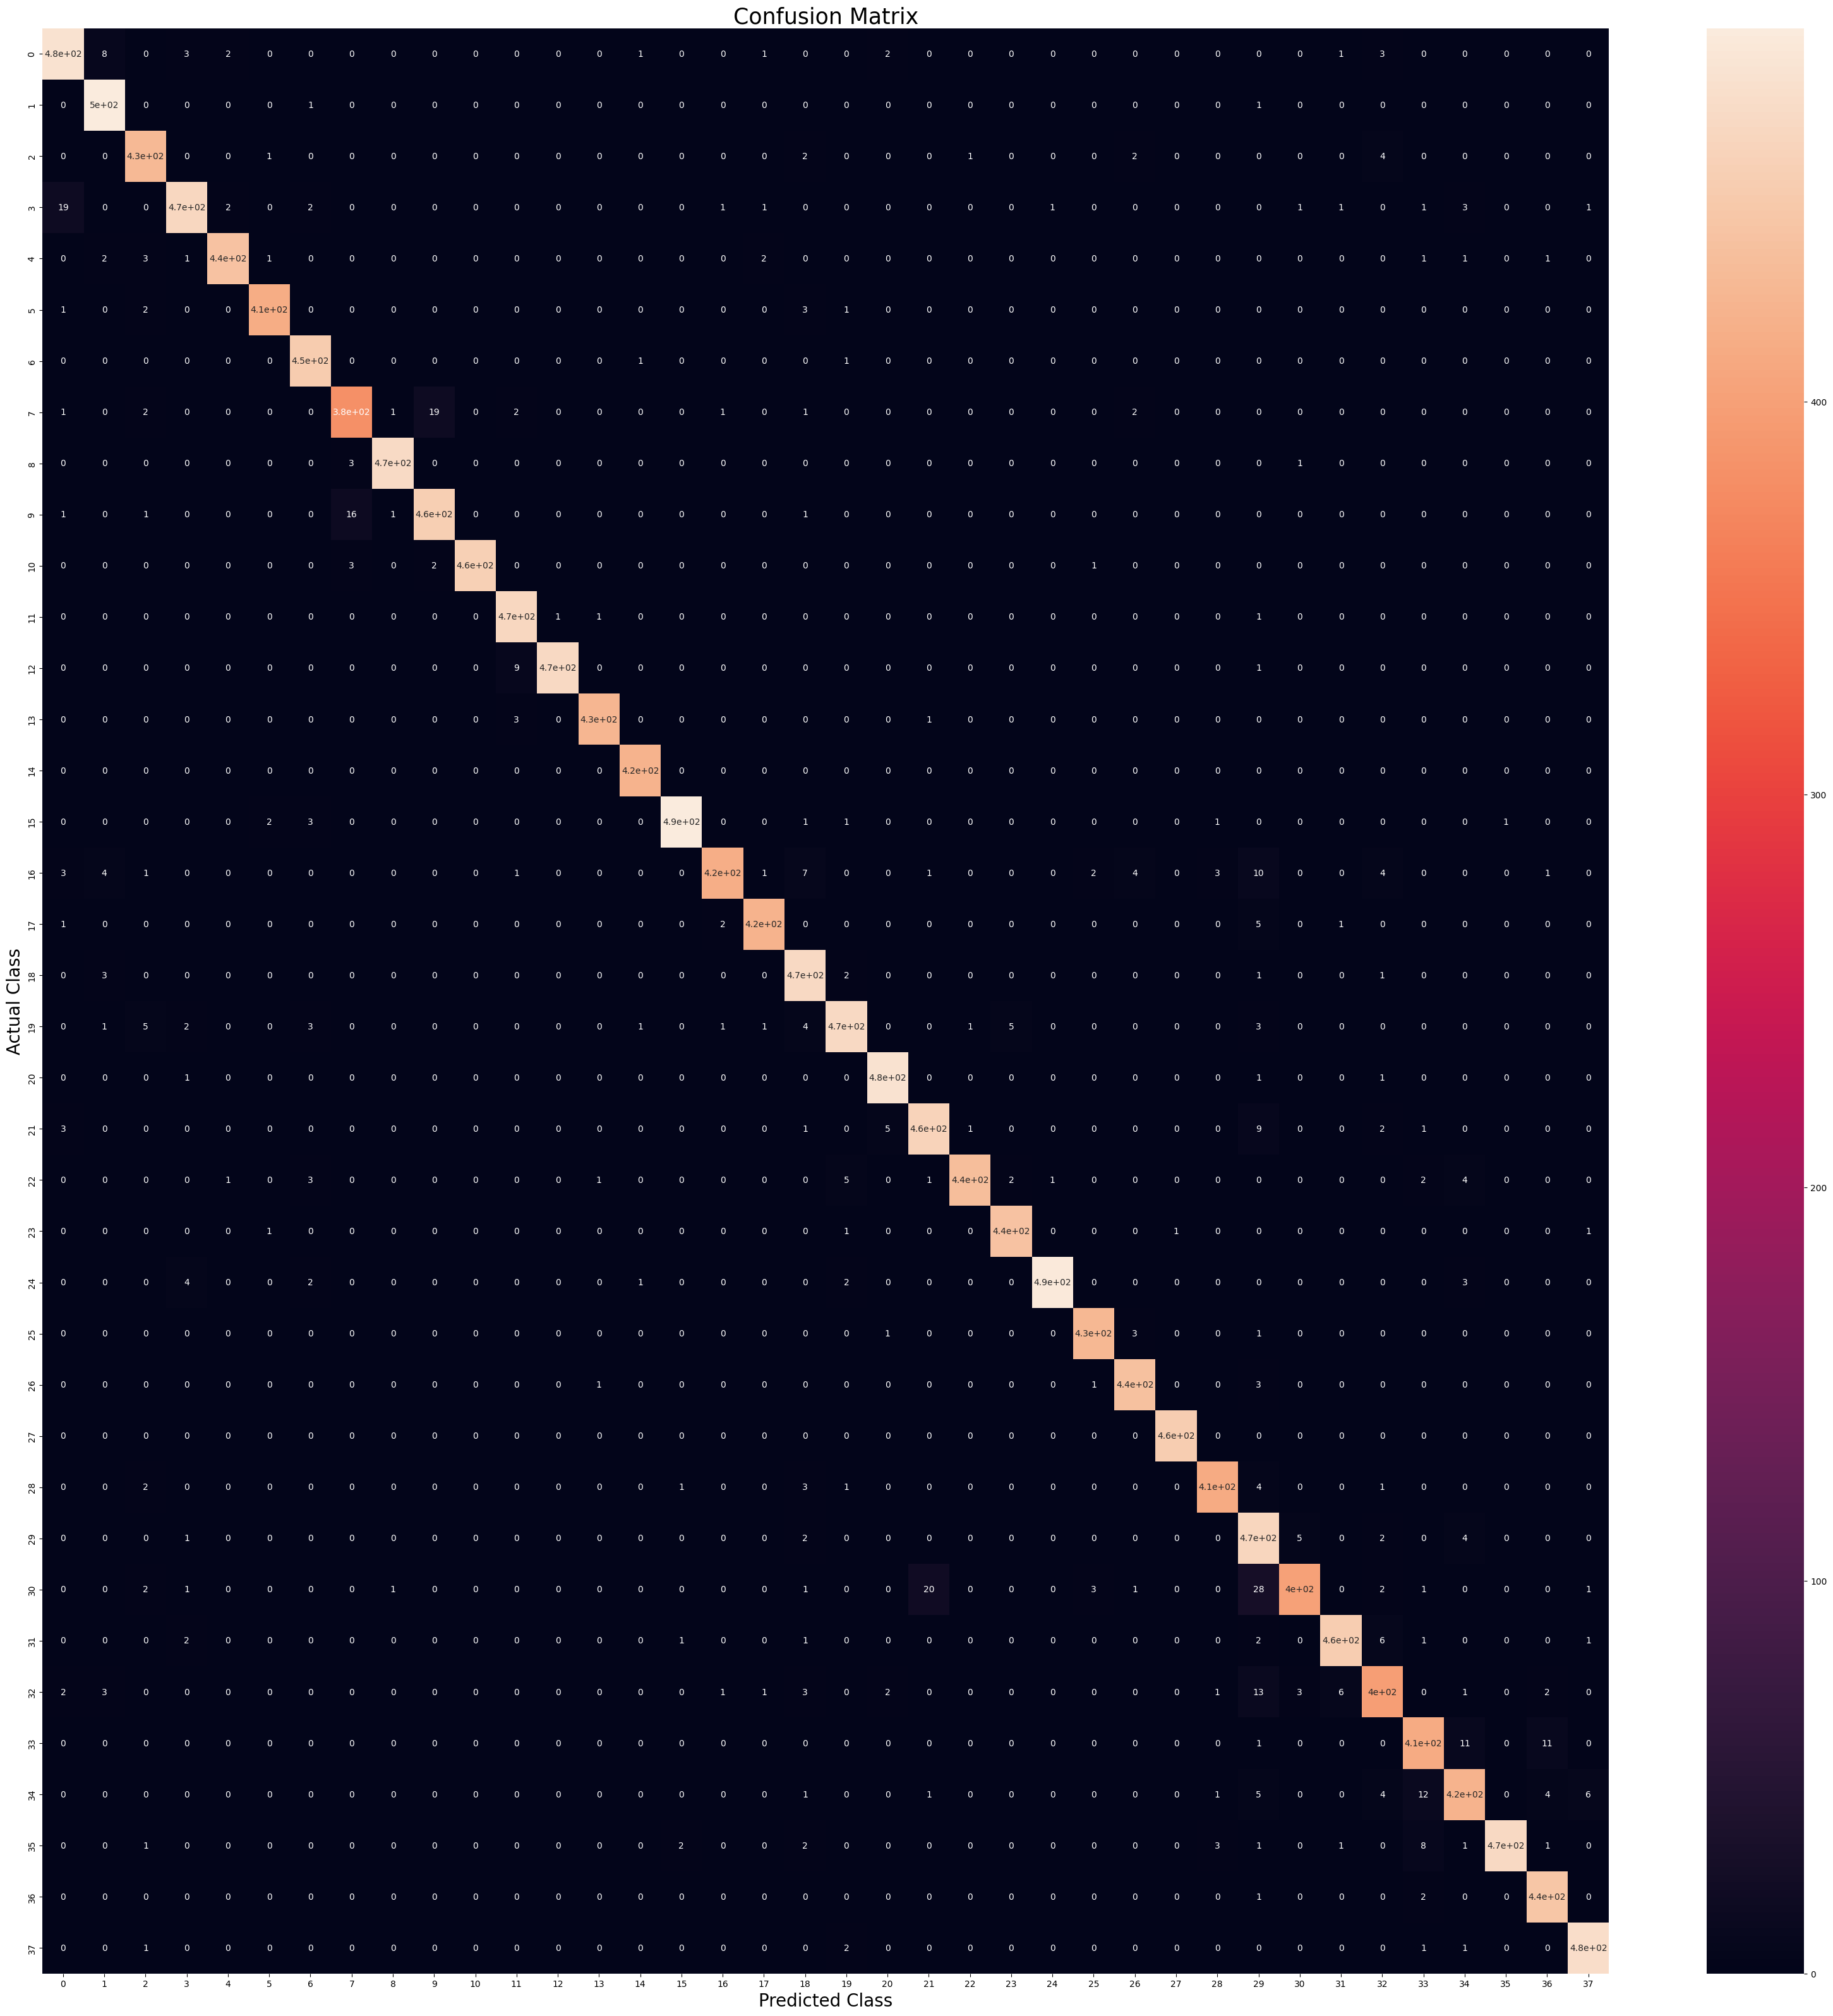

In [151]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Confusion Matrix",fontsize=25)
plt.show()